In [843]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_datareader import data

In [694]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])

In [855]:
aapl=data.DataReader('AAPL',start='2004',end='2016',data_source='google')

In [856]:
aapl=aapl['Close']

In [858]:
#Apply freqency to data
aapl=aapl.asfreq('D',method='pad')

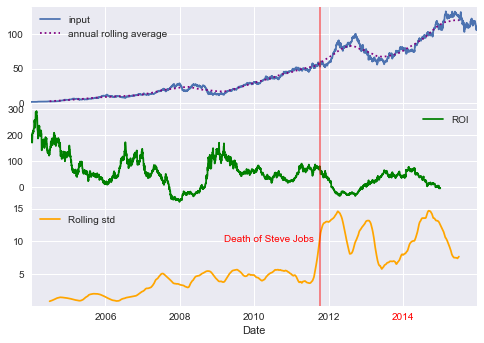

In [906]:
fig,ax=plt.subplots(3,sharex=True)
fig.subplots_adjust(hspace=0)

aapl.plot(ax=ax[0],style='-')
rolling=aapl.rolling(365,center=True)
rolling.mean().plot(ax=ax[0],style=':',color='purple')
ax[0].legend(['input','annual rolling average'],loc=2)

ROI=100*(aapl.tshift(-365)/aapl-1)
ROI.plot(ax=ax[1],style='-',color='green')
ax[1].legend(['ROI'],loc='upper right')

rolling.std().plot(ax=ax[2],style='-',color='orange')
ax[2].legend(["Rolling std"],loc=2)

jobs_death=pd.to_datetime('2011-10-05')
ax[0].axvline(jobs_death,color='red',alpha=0.5)
ax[2].get_xticklabels()[5].set(weight='light',color='red')
ax[1].axvline(jobs_death,color='red',alpha=0.5)
ax[2].axvline(jobs_death,color='red',alpha=0.5)

style=dict(size=10,color='red')

ax[2].text('2011-08-05',10,'Death of Steve Jobs',ha='right',**style)